In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [2]:
tips_df= pd.read_csv('/kaggle/input/tips-csv/tip.csv')

In [3]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips_df['smoker'] = tips_df['smoker'].map({'Yes': 1, 'No': 0})
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,Sun,Dinner,2
1,10.34,1.66,Male,0,Sun,Dinner,3
2,21.01,3.50,Male,0,Sun,Dinner,3
3,23.68,3.31,Male,0,Sun,Dinner,2
4,24.59,3.61,Female,0,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,0,Sat,Dinner,3
240,27.18,2.00,Female,1,Sat,Dinner,2
241,22.67,2.00,Male,1,Sat,Dinner,2
242,17.82,1.75,Male,0,Sat,Dinner,2


In [5]:
cols_to_dummies = ['sex','day','time']
tips_with_dummies=pd.get_dummies(tips_df,columns= cols_to_dummies,dtype=int)
tips_with_dummies_and_original= pd.concat([tips_df[cols_to_dummies],tips_with_dummies],axis=1)
tips_with_dummies_and_original

,sex,day,time,total_bill,tip,smoker,size,sex_Female,sex_Male,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,Female,Sun,Dinner,16.99,1.01,0,2,1,0,0,0,1,0,1,0
1,Male,Sun,Dinner,10.34,1.66,0,3,0,1,0,0,1,0,1,0
2,Male,Sun,Dinner,21.01,3.50,0,3,0,1,0,0,1,0,1,0
3,Male,Sun,Dinner,23.68,3.31,0,2,0,1,0,0,1,0,1,0
4,Female,Sun,Dinner,24.59,3.61,0,4,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,Male,Sat,Dinner,29.03,5.92,0,3,0,1,0,1,0,0,1,0
240,Female,Sat,Dinner,27.18,2.00,1,2,1,0,0,1,0,0,1,0
241,Male,Sat,Dinner,22.67,2.00,1,2,0,1,0,1,0,0,1,0
242,Male,Sat,Dinner,17.82,1.75,0,2,0,1,0,1,0,0,1,0


In [6]:
base_tips=tips_with_dummies_and_original.drop(['sex','day','time'],axis=1)
base_tips

,total_bill,tip,smoker,size,sex_Female,sex_Male,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,0,2,1,0,0,0,1,0,1,0
1,10.34,1.66,0,3,0,1,0,0,1,0,1,0
2,21.01,3.50,0,3,0,1,0,0,1,0,1,0
3,23.68,3.31,0,2,0,1,0,0,1,0,1,0
4,24.59,3.61,0,4,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,3,0,1,0,1,0,0,1,0
240,27.18,2.00,1,2,1,0,0,1,0,0,1,0
241,22.67,2.00,1,2,0,1,0,1,0,0,1,0
242,17.82,1.75,0,2,0,1,0,1,0,0,1,0


<Axes: >

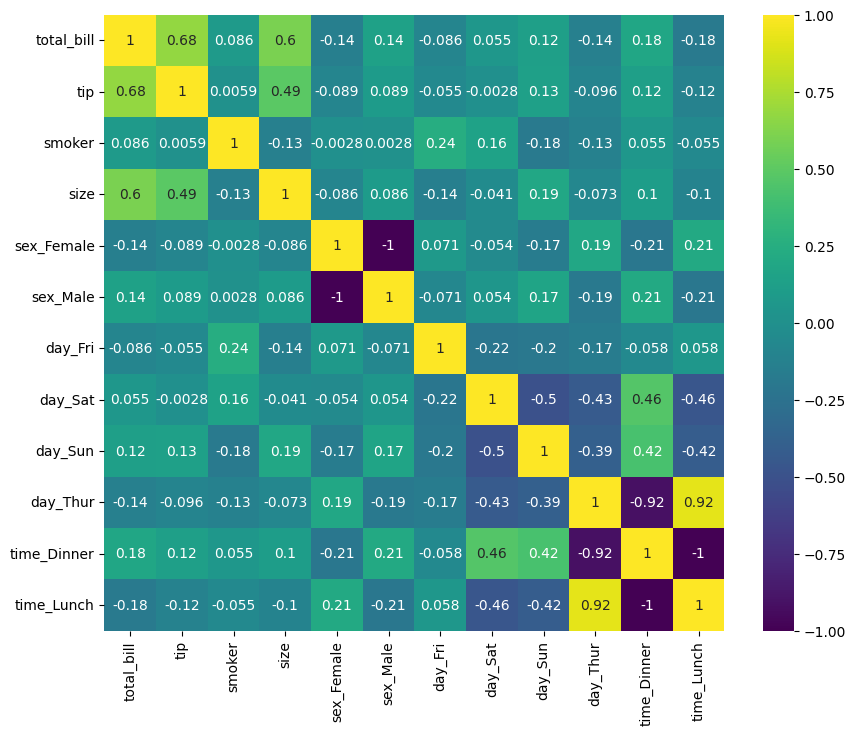

In [7]:
corr=base_tips.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap="viridis", annot=True)

In [8]:
# g= sns.pairplot( base_tips, hue='tip',markers="+")
# plt.show()

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [10]:
X= base_tips.drop(['smoker'],axis=1)
Y=base_tips['smoker']
print(X.shape)
print(Y.shape)

(244, 11)
(244,)


In [11]:
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=5)
print(X_train.shape)
print(Y_train.shape)
print(x_test.shape)
print(y_test.shape)

(146, 11)
(146,)
(98, 11)
(98,)


In [12]:
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)

LogisticRegression()

In [13]:
y_pred=logreg.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [14]:
print('The accuracy of LogesticRegression is : ',(metrics.accuracy_score(y_test,y_pred)))


The accuracy of LogesticRegression is :  0.6122448979591837
